In [1]:
import numpy as np 
import sleepa as sl 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from numba

/Users/manoloflores/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/manoloflores/anaconda3/lib/python3.7/site-packages/bebi103/stan.py:36: UserWarning: Both pystan and cmdstanpy are importable in this environment. As per the cmdstanpy documentation, this is not advised.
  "Both pystan and cmdstanpy are importable in this environment. As per the cmdstanpy documentation, this is not advised."


In [126]:
import colorcet as cc

In [2]:
path_to_data = '../../../prober_lab/data/'

In [5]:
clus_df = pd.read_csv(path_to_data + '200501_clus_report_df_fish_10.csv')

In [10]:
# Load mat file 
neuron_data = sl.load_ahrens_data_figshare(path_to_data + 'subject_10/TimeSeries.h5')

In [5]:
neuron_data.shape

(83396, 4426)

In [6]:
np.random.seed(42)

In [196]:
# Pick 3K random indices
rand_ixs = np.random.choice(np.arange(neuron_data.shape[0]), size = 5000, replace = False)

In [11]:
from numba import njit

In [50]:
@njit
def corr_mat_numba(data):
    """
    Returns Pearson correlation coefficient in numba version
    """
    return np.corrcoef(data)

In [197]:
neuron_sample = neuron_data[rand_ixs, :3000]

In [198]:
%%time
corr_mat = corr_mat_numba(neuron_sample)

CPU times: user 7.84 s, sys: 587 ms, total: 8.43 s
Wall time: 5.64 s


In [199]:
corr_mat.shape

(5000, 5000)

In [200]:
corr_df = pd.DataFrame(corr_mat)

In [201]:
corr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.000000,0.005517,0.029744,0.591296,0.027960,-0.036859,0.025885,0.294817,-0.011012,0.466463,...,0.227314,0.138915,0.189122,-0.008295,0.007507,0.063212,0.078986,0.167302,0.096110,0.270276
1,0.005517,1.000000,0.011741,0.010303,0.000599,0.054495,0.005321,-0.009480,0.032974,0.003868,...,-0.005608,0.036324,0.083381,-0.018600,0.035627,0.051292,0.071680,0.007135,0.022003,0.125557
2,0.029744,0.011741,1.000000,0.074638,0.010789,0.066944,0.084292,0.059233,0.086378,0.098966,...,0.056854,0.074566,0.009324,0.025744,0.065381,0.076069,0.047363,0.036047,0.022896,0.041305
3,0.591296,0.010303,0.074638,1.000000,0.095082,-0.053761,0.055187,0.372282,0.000864,0.480680,...,0.268474,0.151502,0.188221,0.063643,0.150791,0.059280,0.080035,0.161322,0.112336,0.306071
4,0.027960,0.000599,0.010789,0.095082,1.000000,0.028069,-0.077535,0.086881,-0.041181,0.024639,...,0.069306,-0.000048,-0.018146,0.082323,0.111644,0.024123,-0.035178,-0.003408,0.010763,0.052195


In [202]:
clusters = clus_df.iloc[rand_ixs].cluster_labels.to_numpy()

In [203]:
corr_df['cluster_labels'] = clusters

In [204]:
corr_df.sort_values(by = 'cluster_labels', inplace = True)

In [205]:
corr_df_ = corr_df[corr_df.index.to_list() + ['cluster_labels']]

In [206]:
corr_df_.head()

,2154,4125,831,834,4122,1325,3560,3820,1760,3821,...,4750,2276,1611,1610,4748,1605,2271,825,1981,cluster_labels
2154,1.000000,0.137163,0.180522,0.100521,0.130383,0.258343,0.078253,0.240526,0.216872,0.143869,...,0.073588,0.045145,0.149662,0.176899,0.128538,0.284939,0.236199,0.111550,0.002005,0.0
4125,0.137163,1.000000,0.084837,0.080772,0.047228,0.120337,0.042233,0.113695,0.120474,0.099327,...,0.091699,0.053490,0.013882,0.108459,0.055671,0.108673,0.166538,0.090504,0.054163,0.0
831,0.180522,0.084837,1.000000,0.088916,0.083516,0.155320,0.006647,0.093768,0.096403,0.115092,...,0.034160,0.031117,0.057535,0.173427,0.153571,0.172699,0.136960,0.086276,0.086989,0.0
834,0.100521,0.080772,0.088916,1.000000,0.025240,0.089641,0.073484,0.113972,0.046003,0.189438,...,0.041996,0.001427,0.046108,0.064128,0.087024,0.081829,0.088308,0.057857,0.026118,0.0
4122,0.130383,0.047228,0.083516,0.025240,1.000000,0.123006,0.036467,0.105313,0.109163,0.059197,...,0.065433,0.048532,0.047054,0.081797,0.075406,0.109116,0.093918,0.037598,0.008989,0.0


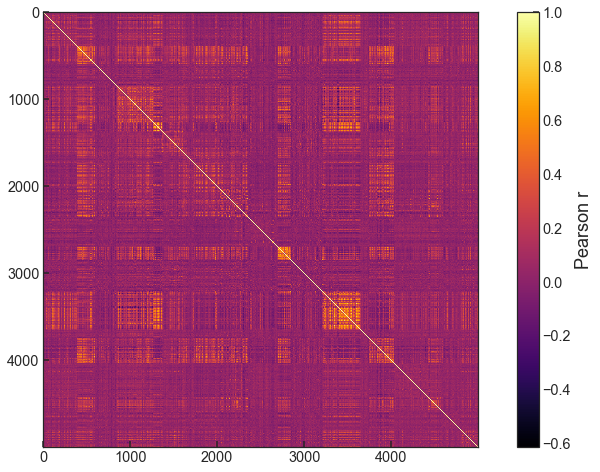

In [207]:
plt.figure(figsize = (14, 8))
plt.imshow(corr_df_.iloc[:, :-1], cmap = 'inferno')
plt.colorbar(label = 'Pearson r')

plt.savefig('../../../prober_lab/figs/figs_for_pres/corr_mat.png', dpi = 240)

In [170]:
palette = cc.glasbey_cool[::-1][:18]

In [171]:
max(clusters)

17.0

In [172]:
palette_dict=  dict(zip( np.arange(18), palette ))

In [173]:
palette_dict

{0: '#3f8795',
 1: '#6e91ff',
 2: '#00878a',
 3: '#524fd8',
 4: '#6b9e77',
 5: '#a8efe6',
 6: '#aeaac8',
 7: '#5764a5',
 8: '#01d1ca',
 9: '#24fffd',
 10: '#9a9cb8',
 11: '#9180ff',
 12: '#4d7760',
 13: '#87d8b8',
 14: '#3aa3b3',
 15: '#414d85',
 16: '#0e6262',
 17: '#544997'}

In [174]:
corr_df_.head()

,140,251,252,253,429,291,42,43,418,48,...,327,486,472,97,246,411,410,498,476,cluster_labels
140,1.000000,0.065422,0.134997,0.074852,0.059229,0.101045,0.055712,0.069794,0.110962,0.095172,...,0.066678,0.003510,0.041084,0.034927,0.059663,0.092479,0.045819,0.060509,-0.010632,0.0
251,0.065422,1.000000,0.136245,0.063160,0.096994,0.111519,0.086205,0.092123,0.109838,0.107025,...,0.078389,0.049049,0.095207,0.020679,0.028037,0.027059,0.015166,0.036189,0.022780,0.0
252,0.134997,0.136245,1.000000,0.139669,0.090199,0.131036,0.126207,0.075776,0.149354,0.177179,...,0.096662,0.074131,0.109987,0.039817,0.050738,0.071934,0.007826,0.041803,0.038838,0.0
253,0.074852,0.063160,0.139669,1.000000,0.000589,0.140291,0.054691,0.067332,0.187557,0.142276,...,0.093505,0.084112,0.057352,-0.041535,0.070693,0.035082,0.017581,0.033846,-0.072004,0.0
429,0.059229,0.096994,0.090199,0.000589,1.000000,0.053880,0.031633,0.005138,0.043480,0.021911,...,0.030155,0.064715,0.056445,0.031833,-0.004133,0.050101,-0.000750,0.005188,0.055957,0.0


In [210]:
sl.set_plotting_style()

In [211]:
color_series = pd.Series(
    corr_df.cluster_labels.values, 
    index = corr_df_.index
).map(palette_dict)

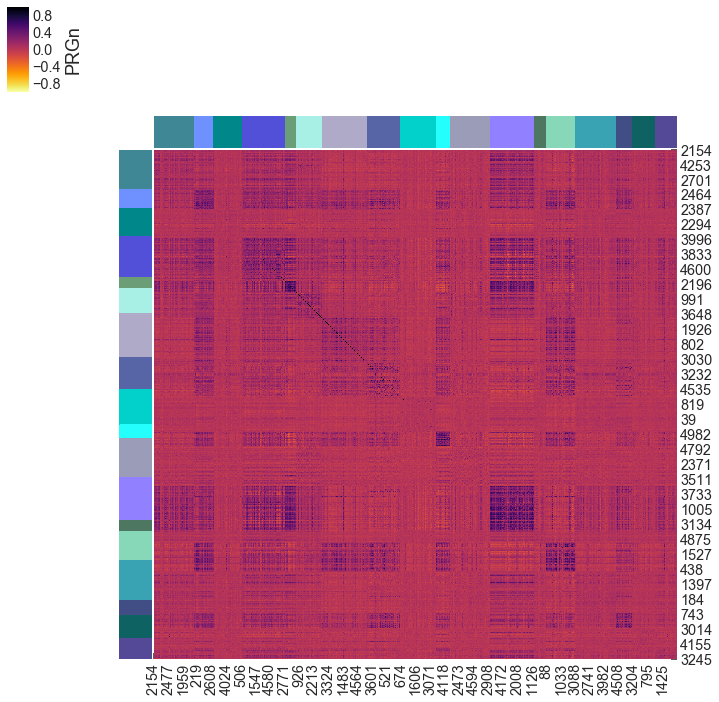

In [212]:
cm =  sns.clustermap(
    corr_df_.iloc[:, :-1], 
    center = 0, 
    row_colors = color_series, 
    row_cluster = False, 
    col_cluster = False, 
    col_colors = color_series, 
    cmap = 'inferno_r', 
    cbar_kws = {'label': 'PRGn'}, 
    figsize = (12, 12), 
    vmin = -1
    #xtick_labels = [''], 
    #ytick_labels = ['']
)

# Add legend 
# for label in np.unique(clusters):
#     cm.ax_col_dendrogram.bar(0, 0, color=palette_dict[label],
#                             label=label, linewidth=0)
# cm.ax_col_dendrogram.legend(loc="center", ncol=6)
# cm.cax.set_position([.05, .2, .03, .45])

#cm.set_xticklabels('off')

plt.savefig('../../../prober_lab/figs/figs_for_pres/corr_mat_sns.png', dpi = 240)